## 使うライブラリをインポートして，乱数のseedを固定

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


seed  = 11
np.random.seed(seed)

### まず，フィッティングしたいデータセット$\boldsymbol{D}$を生成

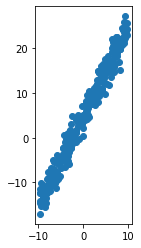

In [2]:
N = 300
x1 =  20 * (np.random.rand(N)) - 10
x2 =  x1 + np.random.normal(x1, 1.9, N) + 5
#x2 = x1

# 2次元 * N個の観測データ
D = np.squeeze(np.dstack([x1,x2]))

plt.scatter(x1,x2)
plt.gca().set_aspect('equal')
plt.show()

## モデルのパラメータ$\boldsymbol{a}$を推定する準備（変数をおく）

In [3]:
# x(shape: (2, N), (1,x_i)を並べた行列)
ones = np.ones(N)
X = np.squeeze(np.dstack([ones, x1]))


# y（shape: (N,1)）
y = x2[:,np.newaxis]
print(y.shape)
print(y)


(300, 1)
[[ -9.46817749]
 [-14.07153961]
 [  3.8946604 ]
 [ 13.05451198]
 [  1.45431755]
 [  7.16328675]
 [-11.42600253]
 [  3.00786155]
 [ 22.30250055]
 [ 18.32475268]
 [ 13.67462237]
 [ -7.73379524]
 [ 22.06043062]
 [ 21.68000974]
 [ -5.02046427]
 [  9.4567649 ]
 [-14.5363493 ]
 [-10.25373674]
 [ -0.39583822]
 [ -8.85640357]
 [ 16.58617755]
 [ 19.95080072]
 [  0.99511725]
 [ -1.39935823]
 [-12.03211003]
 [-14.59466825]
 [ 15.64014028]
 [  9.84927573]
 [-14.55425699]
 [  3.23224653]
 [  0.21433828]
 [ 15.7367568 ]
 [ 14.19190475]
 [  7.58718769]
 [  6.53598007]
 [ 24.36952725]
 [ 24.28522499]
 [ -0.44603694]
 [ -4.60248088]
 [ 16.9176015 ]
 [-12.35976391]
 [  3.1216911 ]
 [-12.52337209]
 [  0.86728517]
 [-13.92129753]
 [ -2.003592  ]
 [ 16.92876525]
 [ 19.8304294 ]
 [ 11.6746728 ]
 [ 10.50310536]
 [  7.44584771]
 [ -2.37046101]
 [ -8.00101103]
 [  2.55820172]
 [ 14.84272607]
 [-12.96724352]
 [-17.01995092]
 [ 17.46924664]
 [ -4.72082451]
 [ 13.47082198]
 [ 15.47814699]
 [ 24.56241302]

## モデルのパラメータ$\boldsymbol{a}$を推定する

In [4]:
# @は内積の演算子， np.linalg.invは逆行列を計算してくれるライブラリ
a = (np.linalg.inv(X.T @ X) @ X.T) @ y
print(a.shape)
print(a)

(2, 1)
[[4.94777244]
 [1.98168286]]


## 推定したモデル$\hat{y}$を描画する

In [5]:
# (1, x_i)が縦に並ぶ行列Xnewをつくる
Nnew = 1000
x= np.linspace(start = -10, stop = 10, num = Nnew)
ones = np.ones(Nnew)
Xnew = np.squeeze(np.dstack([ones,x]))
print(Xnew.shape)
print(Xnew)

Yhat = Xnew @ a
print(Yhat.shape)

(1000, 2)
[[  1.         -10.        ]
 [  1.          -9.97997998]
 [  1.          -9.95995996]
 ...
 [  1.           9.95995996]
 [  1.           9.97997998]
 [  1.          10.        ]]
(1000, 1)


## 観測データの分布上に学習したモデルをプロットする

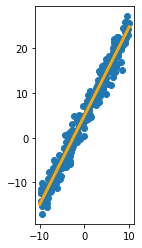

In [9]:
plt.scatter(x1,x2)
plt.plot(x,Yhat, linewidth=3,color='orange')
plt.gca().set_aspect('equal')
plt.show()